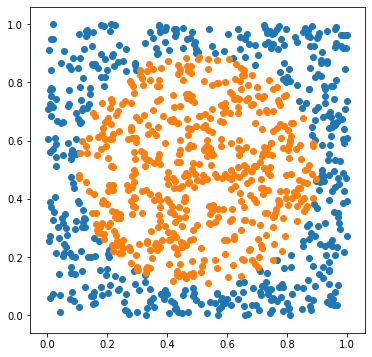

In [1]:
import torch
import math
import matplotlib.pyplot as plt

torch.set_grad_enabled(False)

import Modules
import Optimizer
from helpers import *

data, target = generate_disc_set(1000)

In [2]:
m = Modules.Linear(2,20)
op = m(data)
print(op.size())

b = Modules.ReLu()
print(b(op).size())

torch.Size([1000, 20])
torch.Size([1000, 20])


loss tensor(595.4339)
torch.Size([1000, 2])
relu bw: dldx torch.Size([1000, 2])
relu bw: selfcurrent torch.Size([1000, 2])
relu bw: dl_ds torch.Size([1000, 2])
linear bw: dl_ds torch.Size([1000, 2])
linear bw: selfcurrent torch.Size([1000, 25])
linear bw: computed dw torch.Size([25, 2])
linear bw: db torch.Size([1000, 2])
linear bw: w torch.Size([25, 2])
relu bw: dldx torch.Size([1000, 25])
relu bw: selfcurrent torch.Size([1000, 25])
relu bw: dl_ds torch.Size([1000, 25])
linear bw: dl_ds torch.Size([1000, 25])
linear bw: selfcurrent torch.Size([1000, 25])
linear bw: computed dw torch.Size([25, 25])
linear bw: db torch.Size([1000, 25])
linear bw: w torch.Size([25, 25])
relu bw: dldx torch.Size([1000, 25])
relu bw: selfcurrent torch.Size([1000, 25])
relu bw: dl_ds torch.Size([1000, 25])
linear bw: dl_ds torch.Size([1000, 25])
linear bw: selfcurrent torch.Size([1000, 2])
linear bw: computed dw torch.Size([2, 25])
linear bw: db torch.Size([1000, 25])
linear bw: w torch.Size([2, 25])


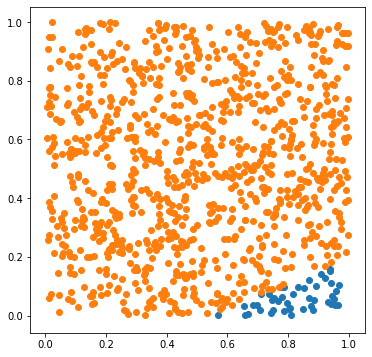

In [3]:
# Train :

nb_epochs = 25
losses = []

# Modules sequence
m1 = Modules.Linear(2,25)
m2 = Modules.Linear(25,25)
m3 = Modules.Linear(25,2)
relu1 = Modules.ReLu()
relu2 = Modules.ReLu()
relu3 = Modules.ReLu()

sequence = Modules.Sequential(m1, relu1, m2, relu2, m3, relu3)

# loss criterion
MSE = Modules.MSE()

# Optimizer
sgd = Optimizer.SGD(sequence.param())

# train
for e in range(1):
    output = sequence(data)
    predicted_classes = output.max(1)[1]
    plot_data(data, predicted_classes)
    loss = MSE(output,target)
    print('loss',loss)
    
    dl_dx = MSE.backward(output,target)
    
    print(dl_dx.size())
    
    sequence.backward(dl_dx)
    
    sgd.step()